In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%pylab inline


Populating the interactive namespace from numpy and matplotlib


### Построим график плотности гауссового вектора $(\xi_1, \xi_2) = N(a, \Sigma)$

$$a = \left( \begin{array}{ccc}
0  \\
0  \end{array} \right)$$
и матрицей ковариаций
$$\Sigma = \left( \begin{array}{ccc}
10 & 8  \\
8 & 10 \end{array} \right) $$

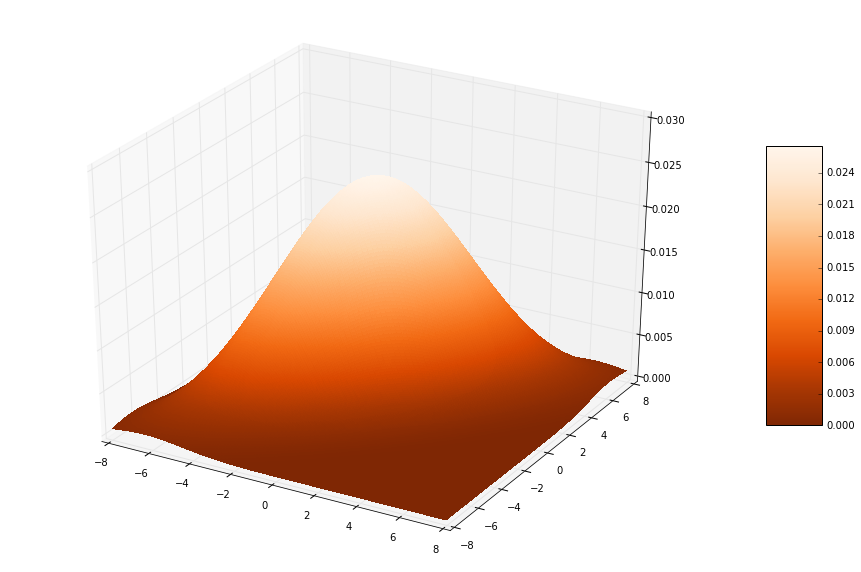

In [26]:
from mpl_toolkits.mplot3d import Axes3D

grid = np.mgrid[-8:8:0.05, -8:8:0.05]
density = np.array([[sps.multivariate_normal.pdf((grid[0, i, j],grid[1, i, j]), 
                                                 mean=[0, 0],
                                                 cov=[[10, 8], [8, 10]])
                       for i in range(grid[0].shape[0])]
                      for j in range(grid[0].shape[1])])

fig = plt.figure(figsize=(16, 10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(grid[0], grid[1], density, rstride=1, cstride=1,
                       cmap='Oranges_r', antialiased=False)
ax.set_zlim(0, 0.03)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

## Условная плотность

### Построим графики  
$$f_{\xi_1|\xi_2}(x, y) = \frac{f_{\xi_1, \xi_2}(x, y)}{f_{\xi_2}(y)}$$


### для $$y = -3, 0, 1, 5$$

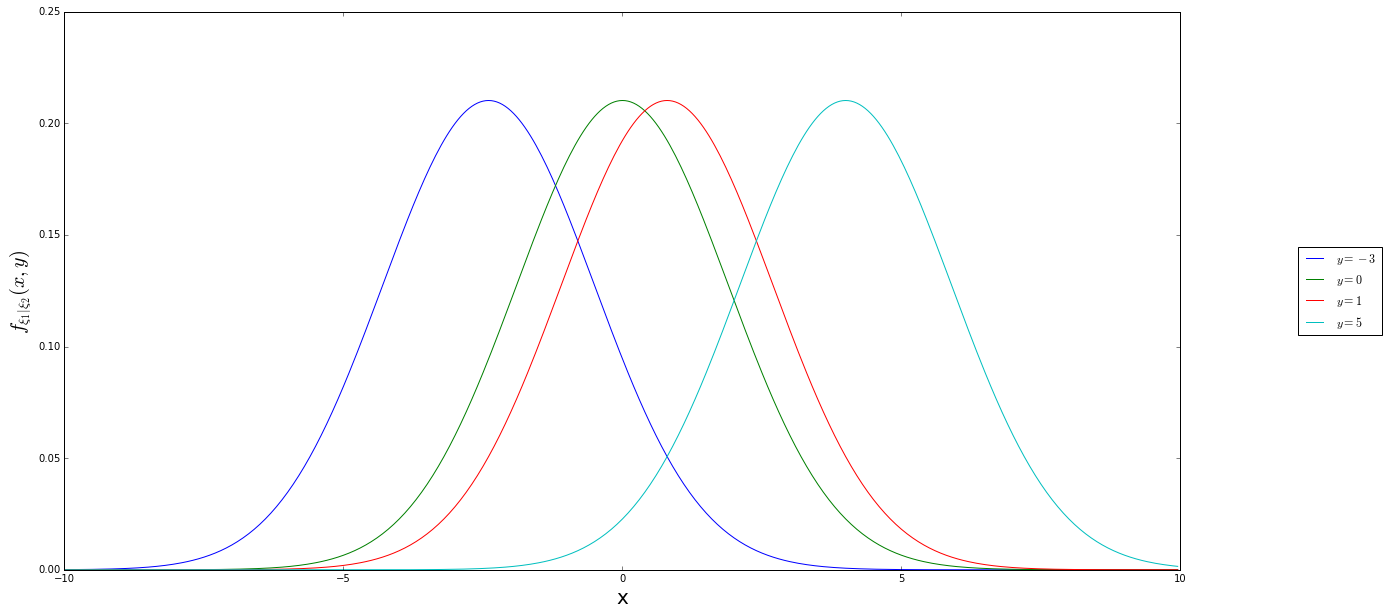

In [2]:
plt.figure(figsize=(20, 10))
plt.xlabel('x', fontsize = 20)
plt.ylabel(r'$f_{\xi_1|\xi_2}(x, y)$', fontsize = 20)
y = np.array([-3, 0, 1, 5])
x = np.array(arange(-10,10,0.05))
for yi in y :
    density = np.array([sps.multivariate_normal.pdf((x[i], yi),
                                                    mean=[0, 0],
                                                    cov=[[10, 8], [8, 10]])
                       for i in range(x.shape[0])]) \
    / sps.norm.pdf(yi, loc=0, scale=sqrt(10))
    
    plt.plot(x,density, label=(r'$y=' + str(yi) + r'$'))
    plt.xlim((-10, 10))  
    plt.ylim((0, 0.25)) 
        
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
        
        
                      
  


### Построим график $E({\xi_1|\xi_2} = y)$ в зависимости от y

Заметим, что $cov(10{\xi_1} - 8{\xi_2}, {\xi_2}) = cov(10{\xi_1}, {\xi_2}) - cov(8{\xi_2},{\xi_2})$ (по аддитивности) = 0,так как $cov({\xi_2}, {\xi_2})=10$, а $cov({\xi_1},{\xi_2}) =8$

$E(10{\xi_1}-8{\xi_2}|{\xi_2})= E(10{\xi_1}-8{\xi_2})$ (так как они получились независимыми(их ковариация 0))

$E(10{\xi_1}-8{\xi_2})=0 $, значит: $$E({\xi_1}|{\xi_2}) = {\frac{4}{5}}{\xi_2}, {\xi_2}= N(0,{ \sqrt10})$$

$x={\frac{4}{5}y}$


$E\xi_1 = 0$ Следовательно, x = 0

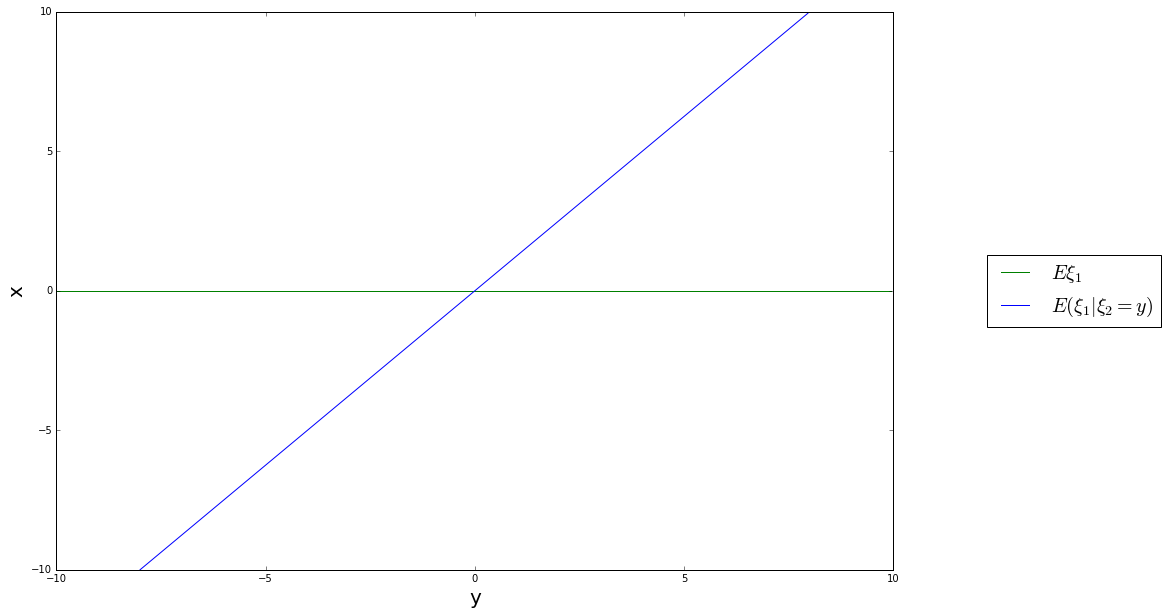

In [95]:
plt.figure(figsize=(15, 10))
plt.xlabel('y', fontsize = 20)
plt.ylabel('x', fontsize = 20)
y = np.array(arange(-10,10,0.05))
x = np.zeros(y.size)
plt.plot(y,x,color='green', label= r'$E{\xi_1}$')
x = (4./5) * y
plt.plot(x, y, label = r'$E({\xi_1|\xi_2} = y)$')
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), fontsize=20)



$E{\xi_1}=E{\xi_2}=0$

Видно,что графики пересекаются в точке (0,0)
